In [1]:
import tensorflow as tf

2022-06-15 02:57:50.729727: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-15 02:57:50.729774: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
tf.__version__

'2.8.0'

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
from  shutil import copyfile
import random
import zipfile

In [4]:
# try:
#     shutil.rmtree('Data\\negative-positive\\')
# except:
#     print("Directory Does not exists")

In [5]:
# # This code block unzips the full Cats-v-Dogs dataset to /tmp
# # which will create a tmp/PetImages directory containing subdirectories
# # called 'Cat' and 'Dog' (that's how the original researchers structured it)
# path_cats_and_dogs ='Data\\dogs-vs-cats.zip'


# local_zip = path_cats_and_dogs
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('Data\\dogs-vs-cats\\')
# zip_ref.close()

In [6]:
# !pwd

In [7]:
# test_path_cats_and_dogs ='/home/elhazard/Desktop/test.zip'


# local_zip = test_path_cats_and_dogs
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('Data\\negative-positive\\')
# zip_ref.close()

In [8]:
# train_path_cats_and_dogs ='/home/elhazard/Desktop/train.zip'


# local_zip = train_path_cats_and_dogs
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('Data\\negative-positive\\train\\')
# zip_ref.close()

In [9]:
BASE_PATH = 'Data\\negative-positive\\train\\'
TRAIN_PATH='Data\\negative-positive\\train_data\\'
VAL_PATH='Data\\negative-positive\\validation_data\\'

In [10]:

# try:
#     shutil.rmtree(TRAIN_PATH)
#     shutil.rmtree(VAL_PATH)
# except:
#     print("Directory does not exists")

In [11]:
# os.mkdir(TRAIN_PATH)
# os.mkdir(VAL_PATH)
# train_positive=os.path.join(TRAIN_PATH , 'positive')
# train_negative=os.path.join(TRAIN_PATH , 'negative')
# val_positive=os.path.join(VAL_PATH , 'positive')
# val_negative=os.path.join(VAL_PATH , 'negative')
# print(train_positive)
# os.mkdir(train_positive)
# os.mkdir(train_negative)
# os.mkdir(val_positive)
# os.mkdir(val_negative)

In [12]:
# #segregating cats and dog files for training and validation
# cat_file_list=[]
# dog_file_list=[]
# for file in os.listdir(BASE_PATH):
#     if file[:3]=='negative':
#         cat_file_list.append(file)
#     elif file[:3]=='positive':
#         dog_file_list.append(file)
# #shuffling the list


In [13]:
# train_split=0.8

# random.sample(cat_file_list, len(cat_file_list))
# random.sample(dog_file_list, len(dog_file_list))
# num_of_training_files_cat= int(len(cat_file_list)* train_split)
# num_of_training_files_dog= int(len(dog_file_list)* train_split)
# print("Total training cat files", num_of_training_files_cat)
# print("Training files dog", num_of_training_files_dog)
# print("Total filess", len(cat_file_list) + len(dog_file_list) )
# print("Total val Dog files", len(dog_file_list) - num_of_training_files_dog)
# print("Total val Cat files", len(dog_file_list) - num_of_training_files_cat)
# for file in cat_file_list[:num_of_training_files_cat]:
#    copyfile(os.path.join(BASE_PATH, file), os.path.join(train_cat, file))
   
# for file in cat_file_list[num_of_training_files_cat:]:
#    copyfile(os.path.join(BASE_PATH, file), os.path.join(val_cat, file))

# for file in dog_file_list[:num_of_training_files_dog]:
#    copyfile(os.path.join(BASE_PATH, file), os.path.join(train_dog, file))
   
# for file in dog_file_list[num_of_training_files_dog:]:
#    copyfile(os.path.join(BASE_PATH, file), os.path.join(val_dog, file))
    
    

In [14]:
# print("Total training cat files", num_of_training_files_cat)
# print("Training files dog", num_of_training_files_dog)
# print("Total filess", len(cat_file_list) + len(dog_file_list) )
# print("Total val Dog files", len(dog_file_list) - num_of_training_files_dog)
# print("Total val Cat files", len(dog_file_list) - num_of_training_files_cat)

In [15]:
# print("Total val Dog files", len(dog_file_list) - num_of_training_files_dog)

In [16]:
batch_size = 32 #128
epochs = 50
IMG_HEIGHT = 160
IMG_WIDTH = 160

In [17]:
train_image_generator = ImageDataGenerator(
                                                rescale=1./255,
                                                rotation_range=40,
                                                width_shift_range=.15,
                                                height_shift_range=.15,
                                                horizontal_flip=True,
                                                vertical_flip=True,
                                                zoom_range=0.3                         

                                            ) # Generator for our training data

In [18]:
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [26]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=TRAIN_PATH,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=VAL_PATH,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 425 images belonging to 2 classes.
Found 203 images belonging to 2 classes.


In [27]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

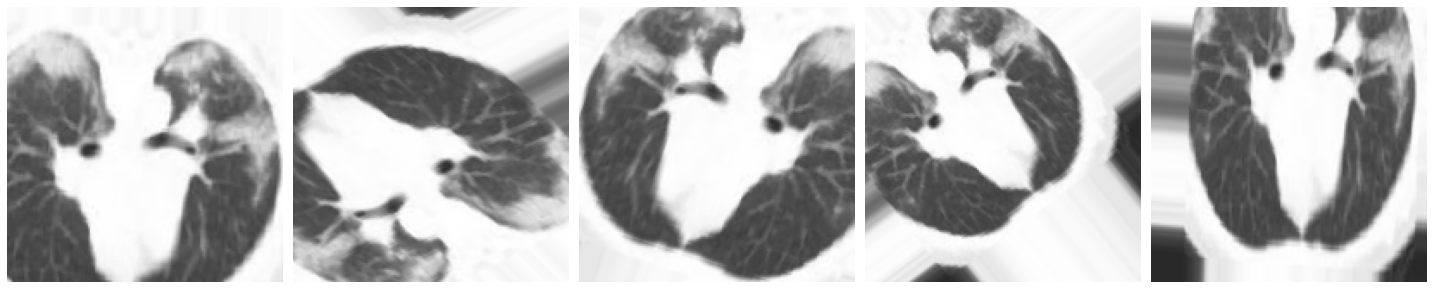

In [28]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [29]:
sample_training_images, _ = next(train_data_gen)

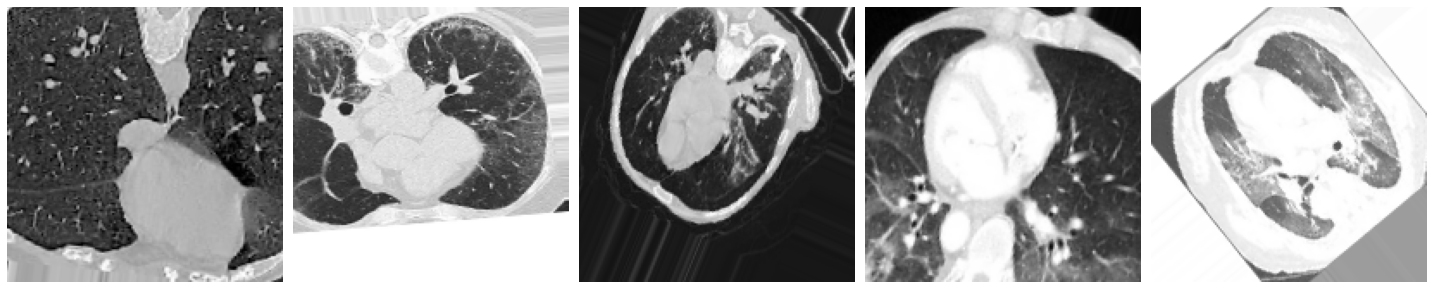

In [30]:
plotImages(sample_training_images[:5])

In [31]:
#Build the model
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),              metrics=['accuracy'])

2022-06-15 03:01:22.437346: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 26214400 exceeds 10% of free system memory.
2022-06-15 03:01:22.478574: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 26214400 exceeds 10% of free system memory.


In [32]:

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=14,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=14
)

/tmp/ipykernel_13050/1107204650.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(
/home/elhazard/anaconda3/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


14/14 [==============================] - 27s 2s/step - loss: 0.8503 - accuracy: 0.5412 - val_loss: 0.6916 - val_accuracy: 0.5172


## Tansfer learning

In [33]:
#from tensorflow.python.keras.applications import imagenet_utils
#from tensorflow.python.keras.layers import Dense,GlobalAveragePooling2D
#from tensorflow.keras.applications import   MobileNetV2
#from tensorflow.python.keras.applications.mobilenet_v2 import preprocess_input
# Create the base model from the pre-trained model MobileNet V2
IMG_SIZE = (160, 160)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [34]:
base_model.trainable = False

In [35]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 20, 20, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 20, 20, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 20, 20, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 20, 20, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 10, 10, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 10, 10, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 10, 10, 384)  1536       ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 10, 10, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 10, 10, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 10, 10, 576)  2304       ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 10, 10, 576)  0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 5, 5, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 5, 5, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 5, 5, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 5, 5, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [36]:
print(len(base_model.layers))

154


In [37]:
x=base_model.output
x=Flatten()(x)
x=Dense(512,activation='relu')(x) #dense layer 3
output=Dense(2,activation='softmax')(x) #final layer with softmax activation


In [38]:
from tensorflow.keras.models import Model
model=Model(inputs=base_model.input,outputs=output)

In [39]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][0]']           

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 20, 20, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 20, 20, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 20, 20, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 20, 20, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 10, 10, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 10, 10, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 10, 10, 384)  1536       ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 10, 10, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 10, 10, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 10, 10, 576)  2304       ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 10, 10, 576)  0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 5, 5, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 5, 5, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 5, 5, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 5, 5, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [40]:
# or if we want to set the first 20 layers of the network to be non-trainable
TRAINABLE_LAYERS= len(model.layers)-len(base_model.layers)+5
print(TRAINABLE_LAYERS)
for layer in model.layers[:-TRAINABLE_LAYERS]:
    layer.trainable=False
for layer in model.layers[-TRAINABLE_LAYERS:]:
    layer.trainable=True

8


In [41]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][0]']           

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 20, 20, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 20, 20, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 20, 20, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 20, 20, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 10, 10, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 10, 10, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 10, 10, 384)  1536       ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 10, 10, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 10, 10, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 10, 10, 576)  2304       ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 10, 10, 576)  0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 5, 5, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 5, 5, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 5, 5, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 5, 5, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [42]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=2e-5), metrics=['acc'])

/home/elhazard/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [43]:
#batch_size=32
epochs=50
step_size_train=train_data_gen.n//train_data_gen.batch_size
print(step_size_train)
print(train_data_gen.n)

history =model.fit_generator(generator=train_data_gen,
                   steps_per_epoch=step_size_train,
                   epochs=epochs)

13
425


/tmp/ipykernel_13050/1142427132.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history =model.fit_generator(generator=train_data_gen,


Epoch 1/50
13/13 [==============================] - 20s 1s/step - loss: 1.1063 - acc: 0.5980
Epoch 2/50
13/13 [==============================] - 14s 1s/step - loss: 0.7184 - acc: 0.6845
Epoch 3/50
13/13 [==============================] - 14s 1s/step - loss: 0.6579 - acc: 0.6921
Epoch 4/50
13/13 [==============================] - 14s 1s/step - loss: 0.5966 - acc: 0.7201
Epoch 5/50
13/13 [==============================] - 15s 1s/step - loss: 0.5792 - acc: 0.7303
Epoch 6/50
13/13 [==============================] - 14s 1s/step - loss: 0.5530 - acc: 0.7532
Epoch 7/50
13/13 [==============================] - 15s 1s/step - loss: 0.5164 - acc: 0.7710
Epoch 8/50
13/13 [==============================] - 14s 1s/step - loss: 0.4847 - acc: 0.8244
Epoch 9/50
13/13 [==============================] - 16s 1s/step - loss: 0.4836 - acc: 0.7964
Epoch 10/50
13/13 [==============================] - 14s 1s/step - loss: 0.4136 - acc: 0.8321
Epoch 11/50
13/13 [==============================] - 14s 1s/step - lo

In [44]:
model.save('model_transfer_20.h5')

In [45]:
model.load_weights('model_transfer_20.h5')

In [48]:
#save your model in the SavedModel format
export_dir = 'saved_model'
tf.saved_model.save(model, export_dir)
# Converting a SavedModel to a TensorFlow Lite model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets
2022-06-15 04:01:18.893098: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-06-15 04:01:18.893173: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2022-06-15 04:01:19.870124: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: saved_model
2022-06-15 04:01:20.117512: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2022-06-15 04:01:20.336285: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: saved_model
2022-06-15 04:01:38.707686: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-06-15 04:02:04.140661: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: saved_model
2022-06-15 04:02:04.586727: I tensorflow/cc/saved_model/loader.cc:301] SavedModel load for tags { ser

In [49]:
optimize="Speed"
if optimize=='Speed':
    converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_LATENCY]
elif optimize=='Storage':
     converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
else:    
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
#reduce the size of a floating point model by quantizing the weights to float16
converter.target_spec.supported_types = [tf.float16]
tflite_quant_model = converter.convert()

2022-06-15 04:03:35.211471: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-06-15 04:03:35.211533: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2022-06-15 04:03:35.212045: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: saved_model
2022-06-15 04:03:35.270158: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2022-06-15 04:03:35.270228: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: saved_model
2022-06-15 04:03:35.496652: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-06-15 04:04:41.962876: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: saved_model
2022-06-15 04:04:42.421302: I tensorflow/cc/saved_model/loader.cc:301] SavedModel load for tags { serve }; Status: success: OK. Took 67209258 microseconds.

In [50]:
open("model_tl.tflite", "wb").write(tflite_model)
open("model_quant_tl.tflite", "wb").write(tflite_quant_model)

37231828

In [51]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_quant_model)
interpreter.allocate_tensors()
#get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [53]:
# import cv2
# import tflite_runtime.interpreter as tflite
# # Read the image and decode to a tensor
# image_path='Data\negative-positive\validation_data\/positive/2020.03.12.20034686-p17-91-1.png' 
# img = cv2.imread(image_path)
# img = cv2.resize(img,(IMG_WIDTH,IMG_HEIGHT))
# #Preprocess the image to required size and cast
# input_shape = input_details[0]['shape']
# input_tensor= np.array(np.expand_dims(img,0), dtype=np.float32)


In [55]:
# #set the tensor to point to the input data to be inferred
# input_index = interpreter.get_input_details()[0]["index"]
# interpreter.set_tensor(input_index, input_tensor)
# #Run the inference
# interpreter.invoke()
# output_details = interpreter.get_output_details()

In [56]:
output_details

[{'name': 'StatefulPartitionedCall:0',
  'index': 180,
  'shape': array([1, 2], dtype=int32),
  'shape_signature': array([-1,  2], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [57]:
prediction = interpreter.get_tensor(output_details[0]['index'])[0]
print((prediction).astype(float))


[0. 0.]


In [58]:
output_data = interpreter.get_tensor(output_details[0]['index'])
results = np.squeeze(output_data)

top_k = results.argsort()

print(results)
top_k
print(top_k)

[0. 0.]
[0 1]


In [59]:
_, top_k_indices=tf.math.top_k(output_data, k= 2)
top_k_indices=np.array(top_k_indices)[0]
top_k_indices

array([0, 1], dtype=int32)

In [60]:
for label, idx in train_data_gen.class_indices.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if top_k[idx]==1:
        print(label, idx, top_k[idx])

positive 1 1


In [61]:
train_data_gen.class_indices

{'negative': 0, 'positive': 1}

In [63]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
# def load_image(img_path, show=False):

#     img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
#     img_tensor = tf.keras.preprocessing.image.img_to_array(img)                    # (height, width, channels)
#     img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
#     img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

#     if show:
#         plt.imshow(img_tensor[0])                           
#         plt.axis('off')
#         plt.show()

#     return img_tensor
  
# #img_path = 'C:/Users/Ferhat/Python Code/Workshop/Tensoorflow transfer learning/blue_tit.jpg'
# img_path='Data\\dogs-vs-cats\\test1\\137.jpg' 
# new_image = load_image(img_path)

# pred = model.predict(new_image)
# pred

In [65]:
# pred